## Problem - 1: Getting Started with Data Exploration

**1. Data Exploration and Understanding:**

• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [63]:
import pandas as pd
# Question 1
data = pd.read_csv('/content/drive/MyDrive/Concepts of AI Colab/Assignment 1/Datasets/WHR-2024-5CS037.csv')
df = pd.DataFrame(data)

print("First 10 rows:")
df.head(10)

First 10 rows:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [64]:
# Question 2
rows, cols = df.shape

print("\nNumber of rows:", rows)
print("\nNumber of columns:", cols)

# Question 3 List all the columns and their data types.
print("\nColumns & data types:")
print(df.dtypes)


Number of rows: 143

Number of columns: 9

Columns & data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**• Basic Statistics:**
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [65]:
# Question 1
score_mean = df['score'].mean()
score_median = df['score'].median()
score_std = df['score'].std()

print("Mean: ", score_mean)
print("Median: ", score_median)
print("Standard Deviation: ", score_std)

# Question 2
max_score = df[df['score'] == df['score'].max()]
min_score = df[df['score'] == df['score'].min()]

print("\nCountry with highest happiness score:")
print(max_score[['Country name', 'score']])

print("\nCountry with lowest happiness score:")
print(min_score[['Country name', 'score']])

Mean:  5.52758041958042
Median:  5.785
Standard Deviation:  1.1707165099442995

Country with highest happiness score:
  Country name  score
0      Finland  7.741

Country with lowest happiness score:
    Country name  score
142  Afghanistan  1.721


**• Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [66]:
# Question 1
missing_values = df.isnull().sum()

print("Missing Values in the dataset:\n")
print(missing_values)

Missing Values in the dataset:

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**• Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [67]:
# Question 1
great_filter = df[df['score'] > 7.5]
print("Countries with score greater than 7.5:\n")
print(great_filter['Country name'])

# Question 2
sort_great_filter = great_filter.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop Countries: ")
sort_great_filter.head(10)

Countries with score greater than 7.5:

0    Finland
1    Denmark
2    Iceland
Name: Country name, dtype: object

Top Countries: 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


**• Adding New Columns:**
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [68]:
import numpy as np

condition = [
    (df['score'] < 4),
    (df['score'] >= 4) & (df['score'] <= 6),
    (df['score'] > 6)
]

category = ['Low', 'Medium', 'High']

df['Happiness Category'] = np.select(condition, category)

print("Dataframe with Happiness Category: ")
df[['Country name', 'score', 'Happiness Category']]

Dataframe with Happiness Category: 


,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
...,...,...,...
138,Congo (Kinshasa),3.295,Low
139,Sierra Leone,3.245,Low
140,Lesotho,3.186,Low
141,Lebanon,2.707,Low


**2. Data Visualizations:**

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

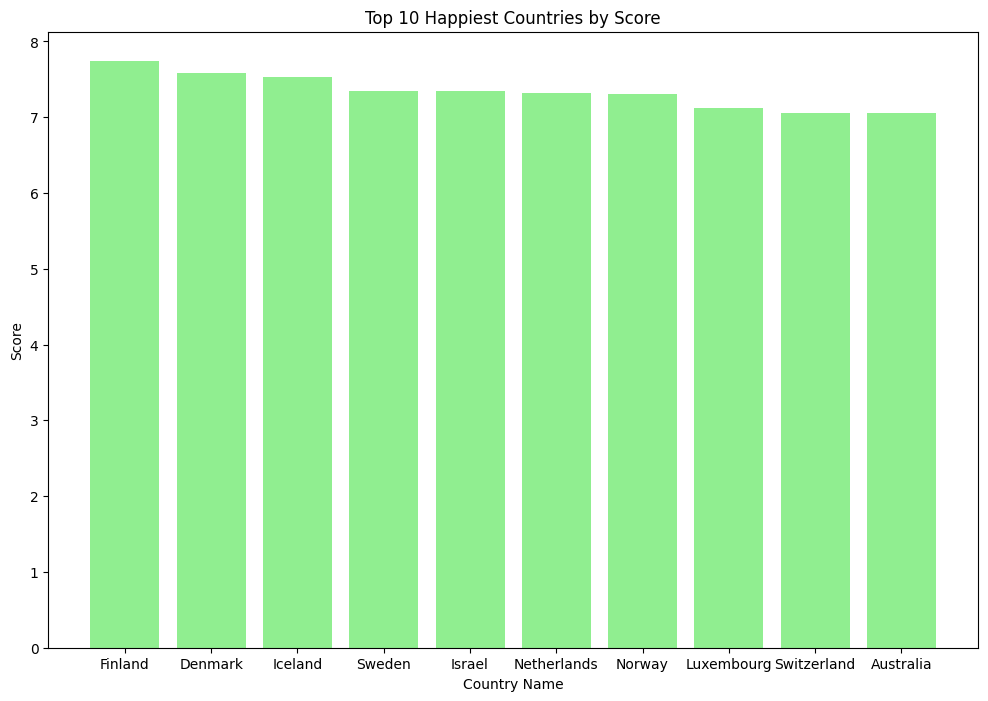

In [69]:
# Bar Plot
import matplotlib.pyplot as plt

top_scores = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(12, 8))

plt.bar(top_scores['Country name'], top_scores['score'], color='lightgreen')

plt.xlabel('Country Name')
plt.ylabel('Score')

plt.title('Top 10 Happiest Countries by Score')
plt.show()

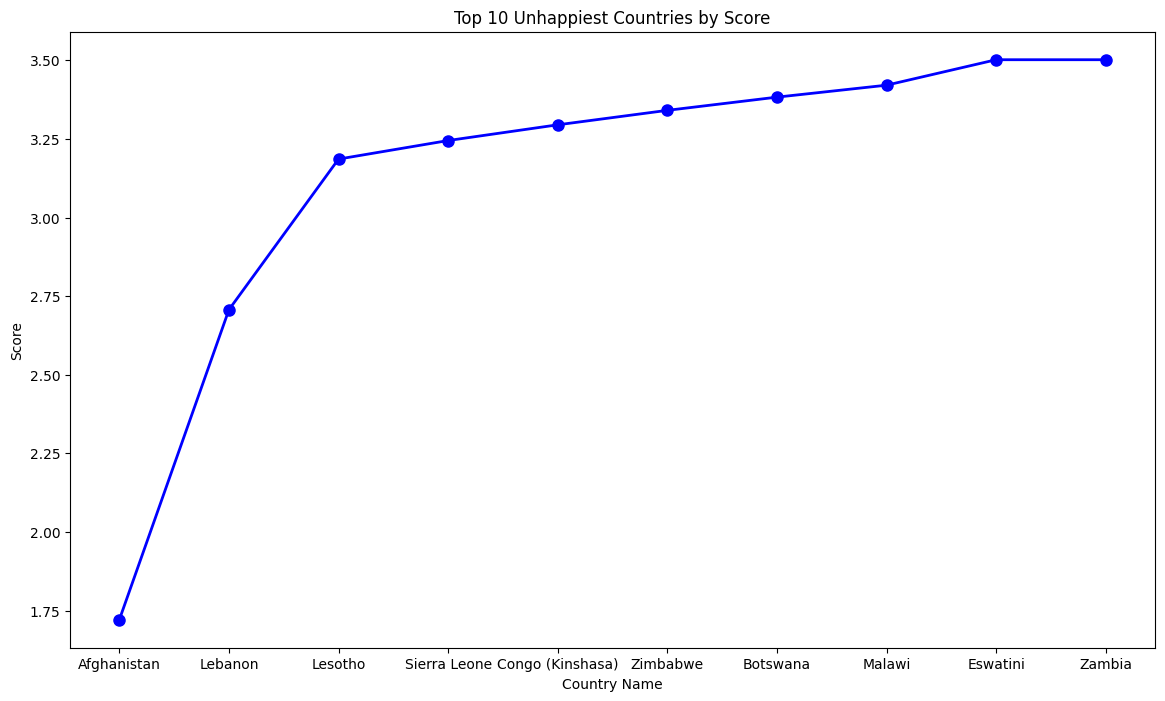

In [70]:
# Line Plot
low_scores = df.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(14, 8))
plt.plot(low_scores['Country name'], low_scores['score'], marker='o', color='blue', linewidth=2, markersize=8)
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.title('Top 10 Unhappiest Countries by Score')
plt.show()


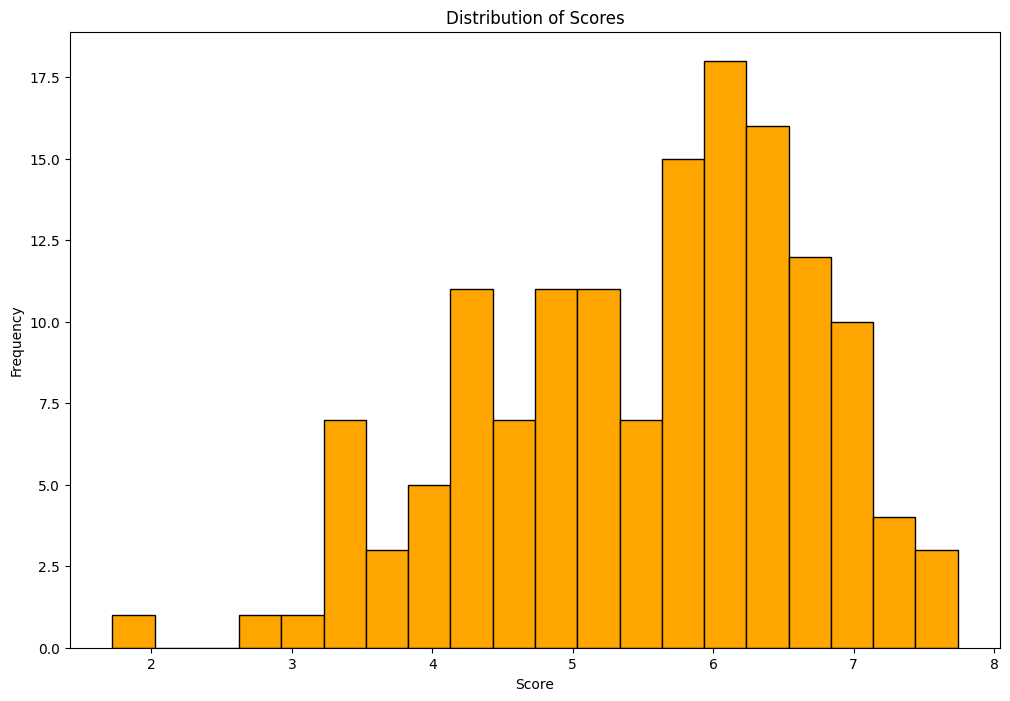

In [71]:
# Plot a histogram
plt.figure(figsize=(12, 8))
plt.hist(df['score'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')

plt.show()

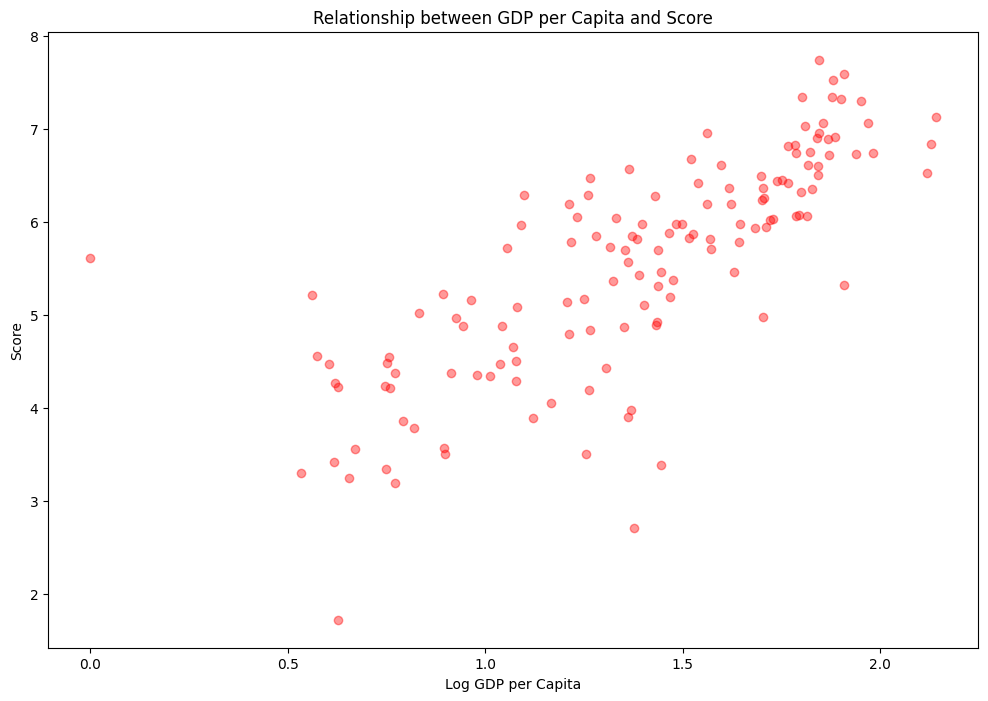

In [72]:
# Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(df['Log GDP per capita'], df['score'], color='red', alpha=0.4)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Relationship between GDP per Capita and Score')

plt.show()

# Problem - 2 - Some Advance Data Exploration Task:

**Task - 1 - Setup Task - Preparing the South-Asia Dataset:**

Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [73]:
# Question 1
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Question 2
filtered_df = df[df['Country name'].isin(south_asian_countries)]

# Question 3
filtered_df.to_csv('/content/drive/MyDrive/Concepts of AI Colab/Assignment 1/Datasets/Filtered South Asia Dataset.csv')

**Task - 2 - Composite Score Ranking:**

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [74]:
# Question 1
filtered_df['Composite Score'] = 0.40 * filtered_df['Log GDP per capita'] + 0.30 * filtered_df['Social support'] + 0.30 * filtered_df['Healthy life expectancy']
filtered_df[['Country name', 'score', 'Composite Score']]

<ipython-input-74-eef2485b562b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Composite Score'] = 0.40 * filtered_df['Log GDP per capita'] + 0.30 * filtered_df['Social support'] + 0.30 * filtered_df['Healthy life expectancy']


,Country name,score,Composite Score
92,Nepal,5.158,0.8159
107,Pakistan,4.657,0.7039
125,India,4.054,0.7874
127,Sri Lanka,3.898,1.0739
128,Bangladesh,3.886,0.6774
142,Afghanistan,1.721,0.3238


In [75]:
# Question 2
rank_composite_score = filtered_df.sort_values(by='Composite Score', ascending=False)
rank_composite_score[['Country name', 'Composite Score']]

,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


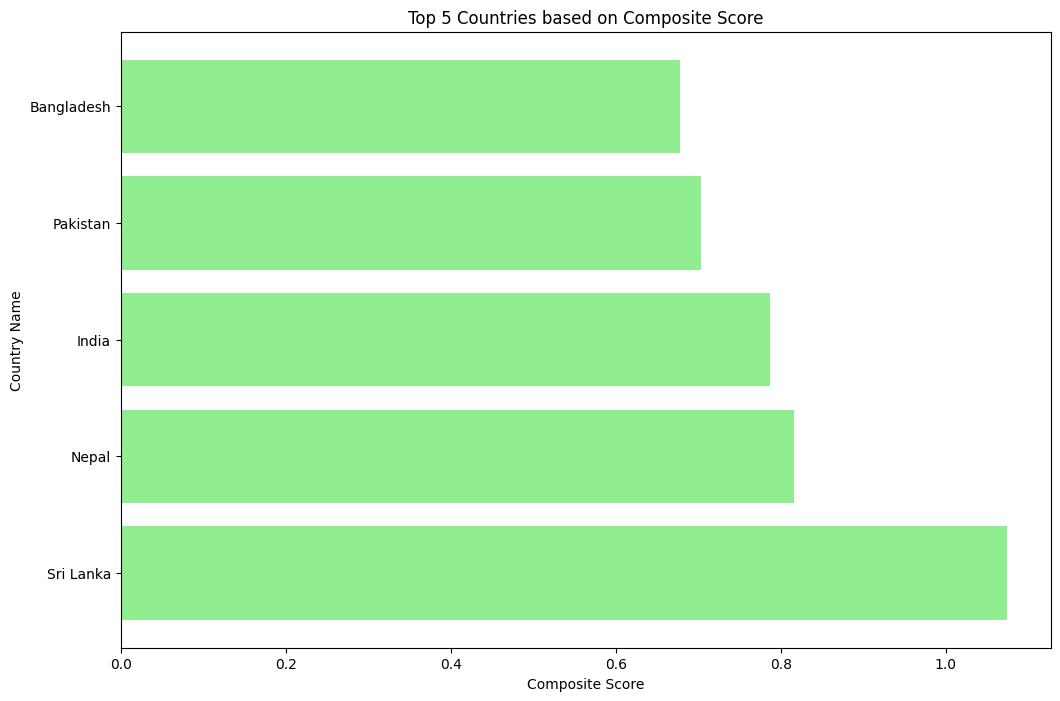

In [76]:
import matplotlib.pyplot as plt

# Question 3
top_5_countries = rank_composite_score.head(5)

plt.figure(figsize=(12, 8))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='lightgreen')
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 Countries based on Composite Score')
plt.show()

**Question 4 Answer:**

The ranking based on the Composite Score and the Original Score do not align perfectly even though they are similar. Since the Original Score has factors like freedom, generosity and corruption along with development indicators which makes it range in 2-5. Whereas, the Composite Score focuses on economic and health indicators like GDP Per Capita, Social Support and Life Expectancy which makes it range in 0-1. As a result, the Original Score is broader whereas the Composite Score is more focused and limited.



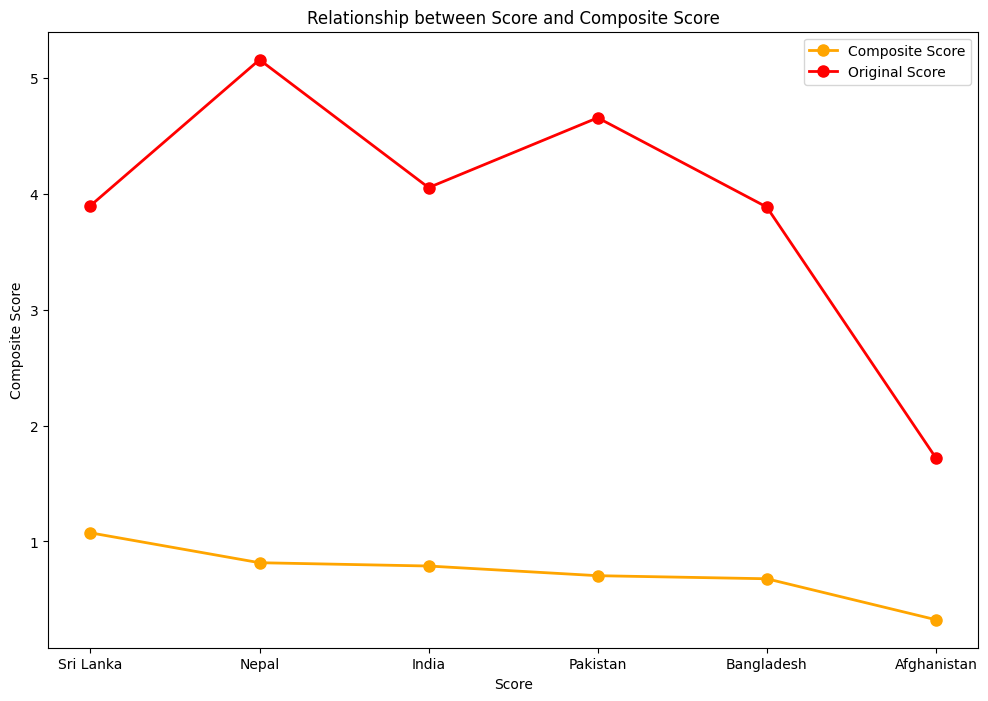

In [77]:
# Question 4
plt.figure(figsize=(12, 8))
plt.plot(rank_composite_score['Country name'], rank_composite_score['Composite Score'], marker='o', color='orange', label='Composite Score', linewidth=2, markersize=8)
plt.plot(rank_composite_score['Country name'], rank_composite_score['score'], marker='o', color='red', label='Original Score', linewidth=2, markersize=8)
plt.xlabel('Score')
plt.ylabel('Composite Score')
plt.title('Relationship between Score and Composite Score')
plt.legend()
plt.show()

**Task - 3 - Outlier Detection:**

Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [78]:
# Question 1
data = df[df['Country name'].isin(south_asian_countries)]
df_quartiles = pd.DataFrame(data)
q1 = df_quartiles['score'].quantile(0.25)
q3 = df_quartiles['score'].quantile(0.75)
IQR = q3 - q1

q1_GDP = df_quartiles['Log GDP per capita'].quantile(0.25)
q3_GDP = df_quartiles['Log GDP per capita'].quantile(0.75)
IQR_GDP = q3_GDP - q1_GDP
print("1st Quartile: ", q1)
print("3rd Quartile: ", q3)
print("Inter Quartile Range: ", IQR)
print("1st Quartile GDP: ", q1_GDP)
print("3rd Quartile GDP: ", q3_GDP)
print("Inter Quartile Range GDP: ", IQR_GDP)

1st Quartile:  3.8890000000000002
3rd Quartile:  4.50625
Inter Quartile Range:  0.6172499999999994
1st Quartile GDP:  0.991
3rd Quartile GDP:  1.155
Inter Quartile Range GDP:  0.16400000000000003


In [79]:
# Question 2
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

lower_bound_GDP = q1_GDP - 1.5 * IQR_GDP
upper_bound_GDP = q3_GDP + 1.5 * IQR_GDP

outliers = data[(data['score'] < lower_bound) | (data['score'] > upper_bound)]
outliers_GDP = data[(data['Log GDP per capita'] < lower_bound_GDP) | (data['Log GDP per capita'] > upper_bound_GDP)]
outliers = pd.concat([outliers, outliers_GDP])
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low


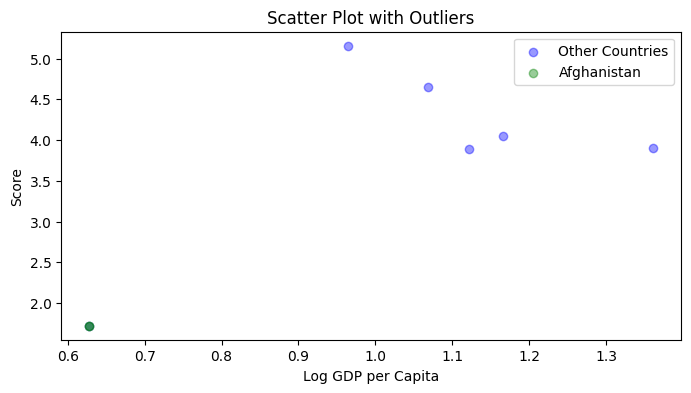

In [80]:
# Question 3
plt.figure(figsize=(8, 4))
plt.scatter(filtered_df['Log GDP per capita'], filtered_df['score'], label='Other Countries', color='blue', alpha=0.4)
plt.scatter(outliers['Log GDP per capita'], outliers['score'], label='Afghanistan', color='green', alpha=0.4)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Scatter Plot with Outliers')
plt.legend()
plt.show()

**Question 4 Answer:**

From the above data & graph it can be seen that Afghanistan has the lowest Log GDP Per Capita. It is the only outlier among the South Asian countries with Log GDP Per Capita (i.e. 0.628) which is also below the regional average (i.e. 1.052). Also looking at the second lowest country which is Bangladesh which has the Log GDP Per Capita (i.e. 1.122) double of Afghanistan making it a huge difference between them.


**Potential Impact on Regional Averages**

Due to this, Afghanistan can affect the average values for South Asia since it has a very low score. Also using this data there can be some misunderstanding for the region's overall happiness and other metrics too which will affect the region itself. As the way to make the information clear, there can be done some adjustments in the data of Afghanistan.

**Task - 4 - Exploring Trends Across Metrics:**

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [81]:
# Question 1

# Calculate correlation using Pearson Method
correlation_total_score = df_quartiles['score'].corr(df_quartiles['score'], method='pearson')
correlation_freedom = df_quartiles['Freedom to make life choices'].corr(df_quartiles['score'], method='pearson')
correlation_generosity = df_quartiles['Generosity'].corr(df_quartiles['score'], method='pearson')

print("Correlation with Total Score: ", correlation_total_score)
print("Correlation with Freedom to Make Life Choices: ", correlation_freedom)
print("Correlation with Generosity: ", correlation_generosity)


Correlation with Total Score:  1.0
Correlation with Freedom to Make Life Choices:  0.8005185224163315
Correlation with Generosity:  0.874512371253192


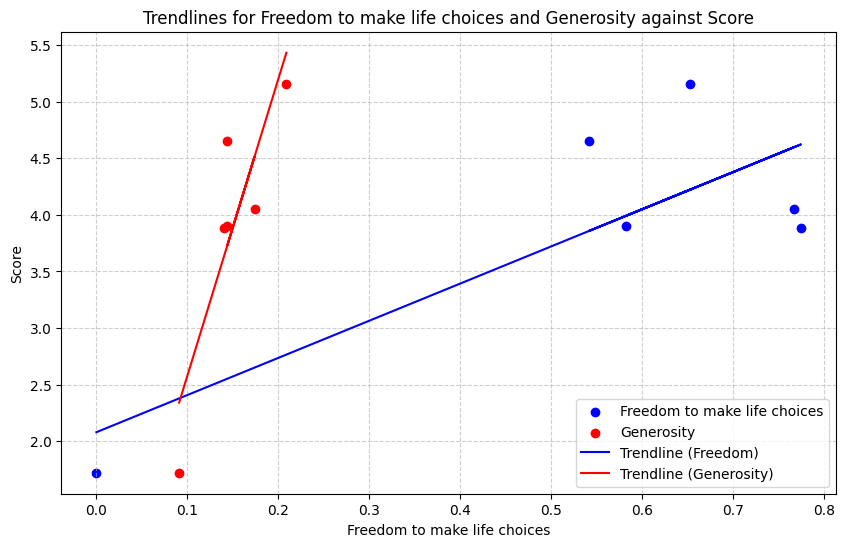

In [82]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for Freedom to make life choices
plt.scatter(filtered_df['Freedom to make life choices'], filtered_df['score'], color='blue', label='Freedom to make life choices')

# Scatter plot for Generosity
plt.scatter(filtered_df['Generosity'], filtered_df['score'], color='red', label='Generosity')

# Trendline for Freedom to make life choices
freedom_x = filtered_df['Freedom to make life choices']
freedom_y = filtered_df['score']
freedom_coeff = np.polyfit(freedom_x, freedom_y, 1)  # Fit a line (degree 1)
freedom_trendline = np.polyval(freedom_coeff, freedom_x)
plt.plot(freedom_x, freedom_trendline, color='blue', linestyle='-', label='Trendline (Freedom)')

# Trendline for Generosity
generosity_y = filtered_df['score']
generosity_x = filtered_df['Generosity']
generosity_coeff = np.polyfit(generosity_x, generosity_y, 1)  # Fit a line (degree 1)
generosity_trendline = np.polyval(generosity_coeff, generosity_x)
plt.plot(generosity_x, generosity_trendline, color='red', linestyle='-', label='Trendline (Generosity)')

# Labels and title
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.title('Trendlines for Freedom to make life choices and Generosity against Score')

# Grid, legend, and display
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

**Question 3 Answer:**

The above correlation matrix shows that the strongest relationship is between Score & Generosity with a correlation of 0.87451237. This means that as Generosity increases so does the Score become higher.

Likewise, the weakest relationship is between Score & Freedom with a correlation of 0.80051852 which makes it the lowest among the three metrics.

**Task - 5 - Gap Analysis:**

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [83]:
# Question 1
filtered_df['GDP-Score Gap'] = filtered_df['Log GDP per capita'] - filtered_df['score']
filtered_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']]

<ipython-input-83-03acd386ee95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['GDP-Score Gap'] = filtered_df['Log GDP per capita'] - filtered_df['score']


,Country name,Log GDP per capita,score,GDP-Score Gap
92,Nepal,0.965,5.158,-4.193
107,Pakistan,1.069,4.657,-3.588
125,India,1.166,4.054,-2.888
127,Sri Lanka,1.361,3.898,-2.537
128,Bangladesh,1.122,3.886,-2.764
142,Afghanistan,0.628,1.721,-1.093


In [84]:
# Question 2
rank_gap_asc = filtered_df.sort_values(by='GDP-Score Gap', ascending=True)
print("Rank by GDP-Score Gap (Ascending):")
print(rank_gap_asc[['Country name', 'GDP-Score Gap']])

rank_gap_dec = filtered_df.sort_values(by='GDP-Score Gap', ascending=False)
print("\nRank by GDP-Score Gap (Decending):")
print(rank_gap_dec[['Country name', 'GDP-Score Gap']])

Rank by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Rank by GDP-Score Gap (Decending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


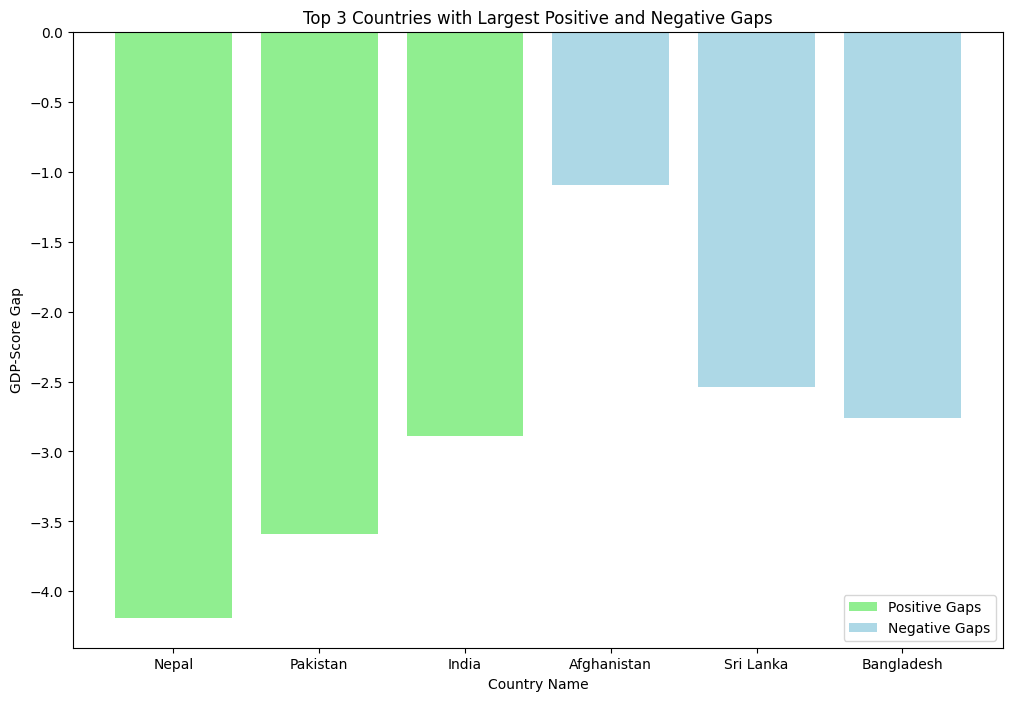

In [85]:
# Question 3
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(rank_gap_asc['Country name'].head(3), rank_gap_asc['GDP-Score Gap'].head(3), label='Positive Gaps', color='lightgreen')
plt.bar(rank_gap_dec['Country name'].head(3), rank_gap_dec['GDP-Score Gap'].head(3), label='Negative Gaps', color='lightblue')
plt.xlabel('Country Name')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with Largest Positive and Negative Gaps')
plt.legend()
plt.show()

**Question 4 Answer:**

As from the above data & figures, the GDP Score Gap is in negative because the Log GDP Per Capita is lower than the wellbeing score which includes factors like Social Support, Life Expectancy & Freedom of Choice. This shows that the countries have less economic output compared to their overall wellbeing. The gap suggests that even though the economic development has occupied , it hasn't led to higher wellbeing scores which courld be due to lack of social services, poor governance or corruption.

# Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [86]:
# Question 1
mid_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
mid_east_df = df[df['Country name'].isin(mid_east_countries)]

mid_east_df = mid_east_df[~mid_east_df['Country name'].isin(["Bahrain", "Palestine"])]

mid_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


**1. Descriptive Statistics:**

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [87]:
# Question 1
mean_score_south_asia = filtered_df['score'].mean()
std_score_south_asia = filtered_df['score'].std()

mean_score_mid_east = mid_east_df['score'].mean()
std_score_mid_east = mid_east_df['score'].std()

print("Mean Score of South Asia: ", mean_score_south_asia)
print("Standard Deviation Score of South Asia", std_score_south_asia)
print("\nMean Score of Middle East: ", mean_score_mid_east)
print("Standard Deviation Score of Middle East", std_score_mid_east)

# Question 2
if mean_score_south_asia > mean_score_mid_east:
  print("\nSouth Asia has higher happiness scores on average.")
else:
  print("\nMiddle East has higher happiness scores on average.")

Mean Score of South Asia:  3.895666666666667
Standard Deviation Score of South Asia 1.1770690152521504

Mean Score of Middle East:  5.351333333333333
Standard Deviation Score of Middle East 1.648656346847335

Middle East has higher happiness scores on average.


**2. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

In [88]:
# Question 1
top_3_south_asia = filtered_df.sort_values(by='score', ascending=False).head(3)
bottom_3_south_asia = filtered_df.sort_values(by='score', ascending=True).head(3)
print("South Asia")
print("\nTop 3 Countries in South Asia:\n")
print(top_3_south_asia[['Country name', 'score']])
print("\nBottom 3 Countries in South Asia:\n")
print(bottom_3_south_asia[['Country name', 'score']])

print("\n----------------------------")

top_3_mid_east = mid_east_df.sort_values(by='score', ascending=False).head(3)
bottom_3_mid_east = mid_east_df.sort_values(by='score', ascending=True).head(3)
print("\nMiddle East")
print("\nTop 3 Countries in Middle East:\n")
print(top_3_mid_east[['Country name', 'score']])
print("\nBottom 3 Countries in Middle East:\n")
print(bottom_3_mid_east[['Country name', 'score']])

South Asia

Top 3 Countries in South Asia:

    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 Countries in South Asia:

    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

----------------------------

Middle East

Top 3 Countries in Middle East:

            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Countries in Middle East:

    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


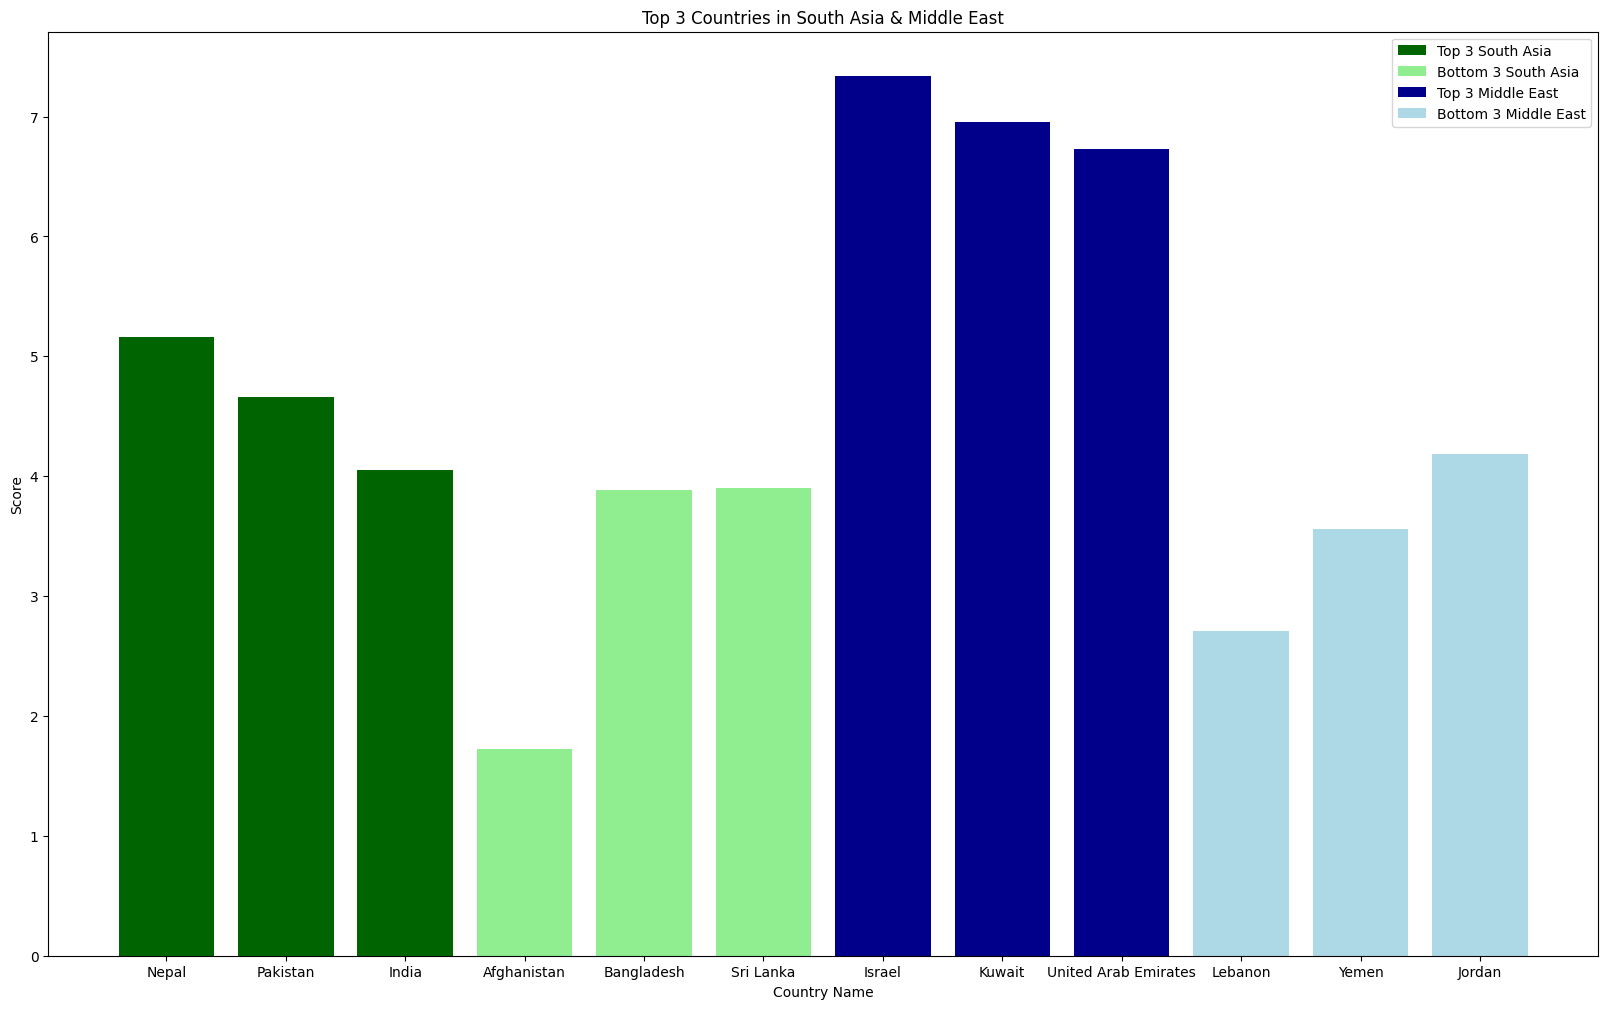

In [89]:
# Question 2
plt.figure(figsize=(20, 12))
plt.bar(top_3_south_asia['Country name'], top_3_south_asia['score'], label='Top 3 South Asia', color='darkgreen')
plt.bar(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], label='Bottom 3 South Asia', color='lightgreen')
plt.bar(top_3_mid_east['Country name'], top_3_mid_east['score'], label='Top 3 Middle East', color='darkblue')
plt.bar(bottom_3_mid_east['Country name'], bottom_3_mid_east['score'], label='Bottom 3 Middle East', color='lightblue')
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.title('Top 3 Countries in South Asia & Middle East')
plt.legend()
plt.show()

**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

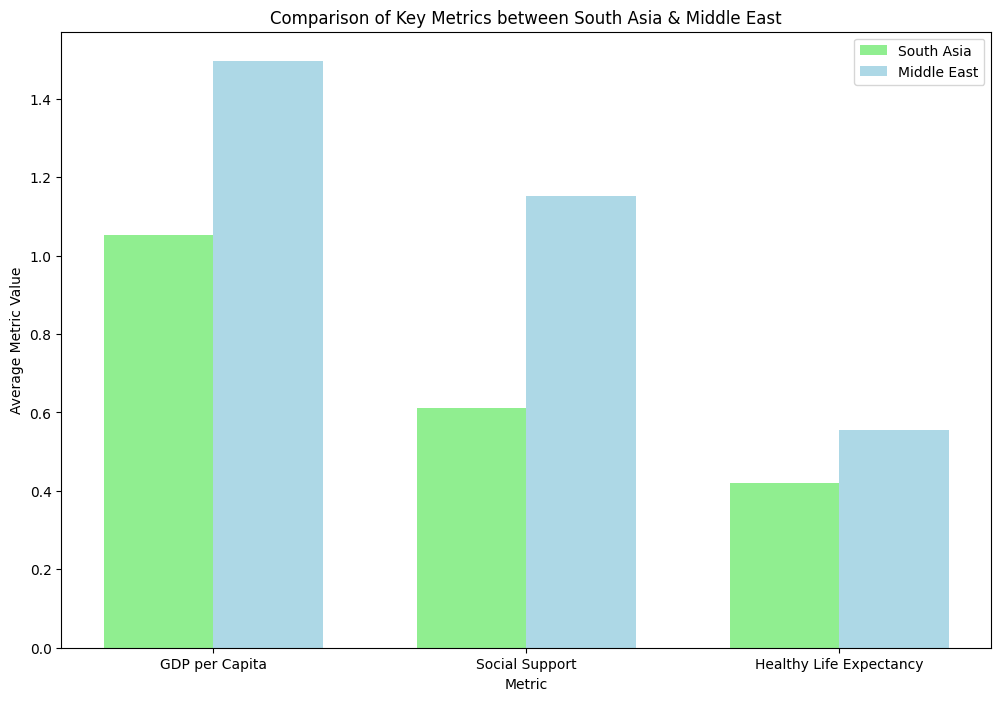

In [90]:
# Question 1
import numpy as np
import matplotlib.pyplot as plt

sa_GDP = filtered_df['Log GDP per capita'].mean()
sa_social = filtered_df['Social support'].mean()
sa_healthy = filtered_df['Healthy life expectancy'].mean()
me_GDP = mid_east_df['Log GDP per capita'].mean()
me_social = mid_east_df['Social support'].mean()
me_healthy = mid_east_df['Healthy life expectancy'].mean()

# Categories for the X-axis
categories = ['GDP per Capita', 'Social Support', 'Healthy Life Expectancy']

# Store Above Values of South Asia & Middle East
sa_values = [sa_GDP, sa_social, sa_healthy]
me_values = [me_GDP, me_social, me_healthy]

bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(12, 8))

# Bar Graph of South Asia
plt.bar(index - bar_width/2, sa_values, bar_width, label='South Asia', color='lightgreen')
# Bar Graph of Middle East
plt.bar(index + bar_width/2, me_values, bar_width, label='Middle East', color='lightblue')

plt.xlabel('Metric')
plt.ylabel('Average Metric Value')
plt.title('Comparison of Key Metrics between South Asia & Middle East')
plt.xticks(index, categories)
plt.legend()
plt.show()

In [91]:
# Question 2
disparity_GDP = abs(sa_GDP - me_GDP)
disparity_social = abs(sa_social - me_social)
disparity_healthy = abs(sa_healthy - me_healthy)

if disparity_GDP > disparity_social and disparity_GDP > disparity_healthy:
    print("The largest disparity is in GDP per Capita.")
elif disparity_social > disparity_GDP and disparity_social > disparity_healthy:
    print("The largest disparity is in Social Support.")
else:
    print("The largest disparity is in Healthy Life Expectancy.")

The largest disparity is in Social Support.


**Question 2 Answer:**

Therefore, from the above code and graphical representation it is clear that the Social Support is the largest disparity.

**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [92]:
# Question 1
range_score_sa = filtered_df['score'].max() - filtered_df['score'].min()
range_score_me = mid_east_df['score'].max() - mid_east_df['score'].min()

cv_sa = np.std(filtered_df['score']) / np.mean(filtered_df['score'])
cv_me = np.std(mid_east_df['score']) / np.mean(mid_east_df['score'])

print("Range of Score in South Asia: ", range_score_sa)
print("Coefficient of Variation of Score in South Asia: ", cv_sa)

print("\nRange of Score in Middle East: ", range_score_me)
print("Coefficient of Variation of Score in Middle East: ", cv_me)

# Question 2
if range_score_sa > range_score_me:
  print("\nSouth Asia has greater variability in happiness")
else:
  print("\nMiddle East has greater variability in happiness")

Range of Score in South Asia:  3.4370000000000003
Coefficient of Variation of Score in South Asia:  0.27582238871994313

Range of Score in Middle East:  4.634
Coefficient of Variation of Score in Middle East:  0.2904637056688655

Middle East has greater variability in happiness


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

In [93]:
# Question 1
correlation_sa = filtered_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
correlation_me = mid_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("Correlation Matrix for South Asia:")
print(correlation_sa)
print("\n-------------------------------------")
print("\nCorrelation Matrix for Middle East:")
print(correlation_me)


Correlation Matrix for South Asia:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

-------------------------------------

Correlation Matrix for Middle East:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity

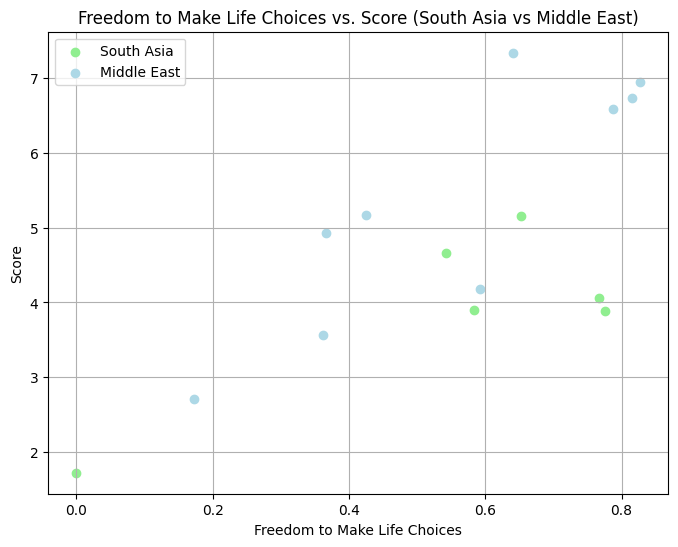

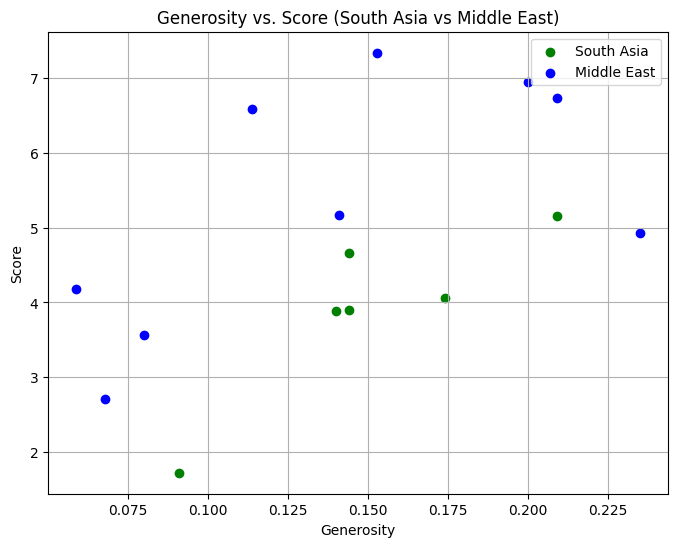

In [94]:
# Question 2
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Freedom to make life choices'], filtered_df['score'], color='lightgreen', label='South Asia')
plt.scatter(mid_east_df['Freedom to make life choices'], mid_east_df['score'], color='lightblue', label='Middle East')

plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('Freedom to Make Life Choices vs. Score (South Asia vs Middle East)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Generosity'], filtered_df['score'], color='green', label='South Asia')
plt.scatter(mid_east_df['Generosity'], mid_east_df['score'], color='blue', label='Middle East')

plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Generosity vs. Score (South Asia vs Middle East)')
plt.grid(True)
plt.legend()
plt.show()

**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [95]:
# Question 1
if outliers.empty:
    print("There are no any Outliers")
else:
    print("Outliers in South Asia based on Score & GDP per Capita:")
    print(outliers)

Outliers in South Asia based on Score & GDP per Capita:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
142                      0.088                0.672                Low  
142                      0.088                0.672                Low  


In [96]:
data_me = df[df['Country name'].isin(mid_east_countries)]
df_quartiles = pd.DataFrame(data_me)

# Create a new DataFrame for quartile calculations
q1_me = df_quartiles['score'].quantile(0.25)
q3_me = df_quartiles['score'].quantile(0.75)
IQR_me = q3_me - q1_me

# Calculate quartiles and IQR for the 'score' column
q3_GDP_me = df_quartiles['Log GDP per capita'].quantile(0.75)
q1_GDP_me = df_quartiles['Log GDP per capita'].quantile(0.25)
IQR_GDP_me = q3_GDP_me - q1_GDP_me

# Identify outliers on the IQR rule
outlier_scores_me = data_me[(data_me['score'] < q1_me - 1.5 * IQR_me) | (data_me['score'] > q3_me + 1.5 * IQR_me)]
outliers_GDP_me = data_me[(data_me['Log GDP per capita'] < q1_GDP_me - 1.5 * IQR_GDP_me) | (data_me['Log GDP per capita'] > q3_GDP_me + 1.5 * IQR_GDP_me)]
outliers_me = pd.concat([outlier_scores_me, outliers_GDP_me])

if outliers_me.empty:
    print("There is no outlier")
else:
    print("Outliers in Middle East based on Score and GDP per Capita:")
    print(outliers_me)

There is no outlier


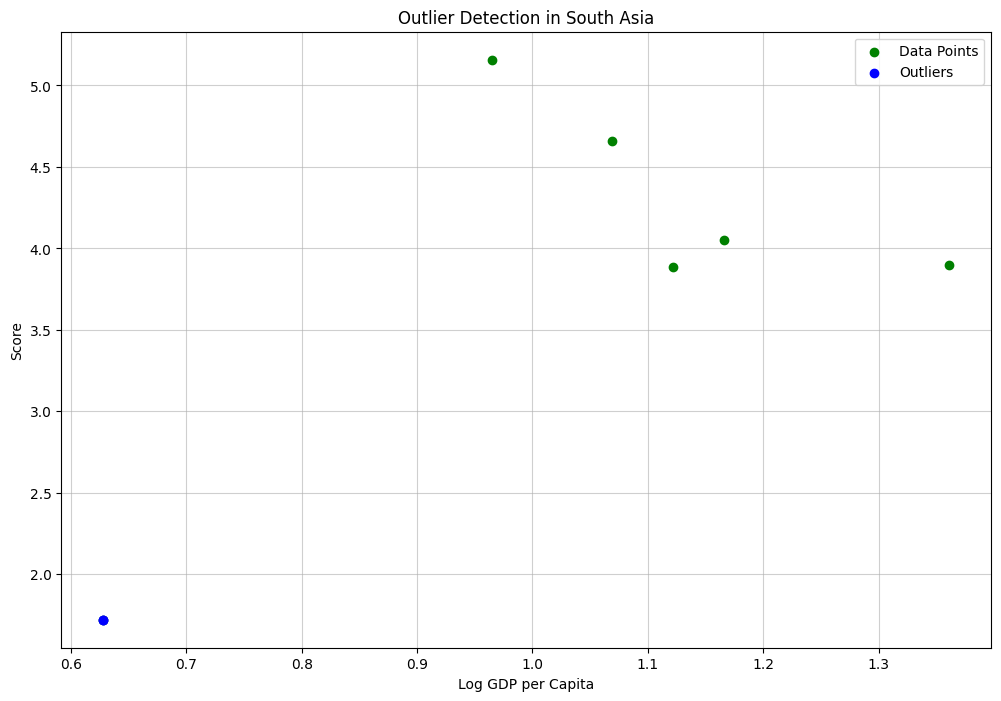

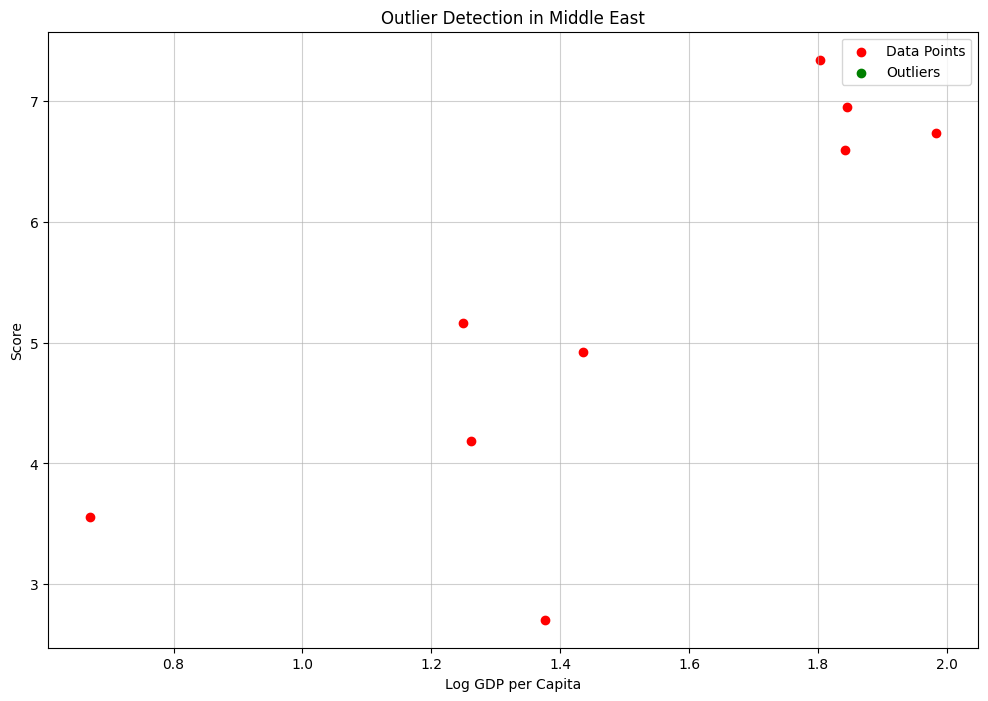

In [97]:
plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['Log GDP per capita'], filtered_df['score'], color='green', label='Data Points')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='blue', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection in South Asia')
plt.grid(True, linestyle='-', alpha=0.6)
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(mid_east_df['Log GDP per capita'], mid_east_df['score'], color='red', label='Data Points')
plt.scatter(outliers_me['Log GDP per capita'], outliers_me['score'], color='green', label='Outliers')  # Assuming you have outliers_ME defined
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection in Middle East')
plt.grid(True, linestyle='-', alpha=0.6)
plt.legend()
plt.show()

**Question 2 Answer:**

**South Asia:**

From the data & graph, we can see Afghanistan as an Outlier in the South Asian region due to its Log GDP (i.e. 0.628) which is below average and also nearly half of the second lowest country showing a major economic gap due to huge difference between Afghanistan and the other countries.

**Middle East:**

From the data & graph, we can see that there is no exact Outlier. Yemen does have somehow relative low Log GDP (i.e. 0.671), but it does have a higher life expectancy. Since the datas are uniform without any significant difference, there is no exact Outlier.

**7. Visualization:**

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

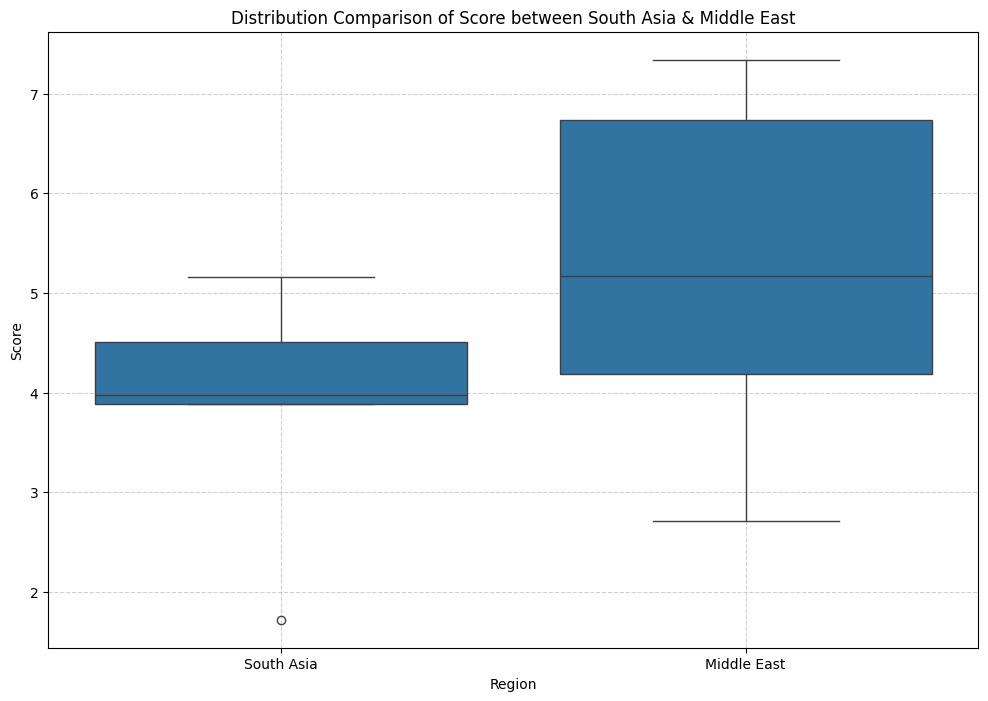

In [98]:
# Question 1
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='score', data=pd.concat([
    filtered_df.assign(Region='South Asia'),
    mid_east_df.assign(Region='Middle East')
]))

plt.xlabel('Region')
plt.ylabel('Score')
plt.title('Distribution Comparison of Score between South Asia & Middle East')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Question 2 Answer:**

**South Asia:**

Interquartile Range (IQR): The box goes from around 4 to 5, meaning most of the scores are within this range.

Whiskers: The whiskers displays that the minimum and maximum values that are not Outliers, ranging from around 1.7(Min) to 5.2(Max).

Median: The median is around 4, as from the horizontal line inside the box.

Outlier: There is one data point below the lower whisker as a circle showing it as an Outlier.



**Middle East:**

Interquartile Range (IQR): The box goes from around 4 to 7, meaning most of the scores are within this range which are more spread out.

Whiskers: The whiskers displays that the there is board range of score, ranging from around 2(Min) to 7(Max).

Median: The median is around 6, as from the horizontal line inside the box which is higher.

Outlier: There are no Outlier showns in the data itself.